In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pydmd import DMD

The input data is generated by a linear combination of following functions:

$f_1(x,t) = \text{sech}(x + 3)\text{exp}(i2.3t) \\
f_2(x,t) = 2\text{sech}(x)\tanh(x)\text{exp}(i2.8t)$

In [2]:
def f1(x,t): 
    return 1./np.cosh(x+3)*np.exp(2.3j*t)

def f2(x,t):
    return 2./np.cosh(x)*np.tanh(x)*np.exp(2.8j*t)

x = np.linspace(-5, 5, 128)
t = np.linspace(0, 4*np.pi, 256)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2
X = X + 0.5 * np.random.randn(X.shape[0], X.shape[1])



In [3]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$', '$f$']
data = [X1, X2, X]

fig = plt.figure(figsize=(17,6))
for n, title, d in zip(range(131,134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

/Users/Jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


Now we have the temporal snapshots in the input matrix rows: we can easily create a new DMD instance and exploit it in order to compute the decomposition on the data. Since the snapshots must be arranged by columns, in this case we need to transpose the matrix.

In [ ]:
dmd = DMD(svd_rank=2)
dmd.fit(X.T)

The dmd object contains the principal information about the decomposition:
- the attribute modes is a 2D numpy array where the columns are the low-rank structures individuated;
- the attribute dynamics is a 2D numpy array where the rows refer to the time evolution of each mode;
- the attribute eigs refers to the eigenvalues of the low dimensional operator;
- the attribute reconstructed_data refers to the approximated system evolution.
Moreover, some helpful methods for the graphical representation are provided.
Thanks to the eigenvalues, we can check if the modes are stable or not: if an eigenvalue is on the unit circle, the corresponding mode will be stable; while if an eigenvalue is inside or outside the unit circle, the mode will converge or diverge, respectively. From the following plot, we can note that the two modes are stable.

Eigenvalue (0.9820902850174499+0.13619111509403403j): distance from unit circle 0.016950652243787667
Eigenvalue (0.9810418345068599+0.11245721881760518j): distance from unit circle 0.024910292883224217


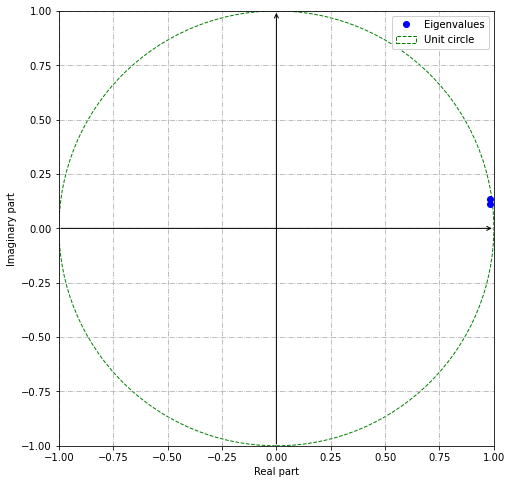

In [ ]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

Plot of the modes and the dynamics

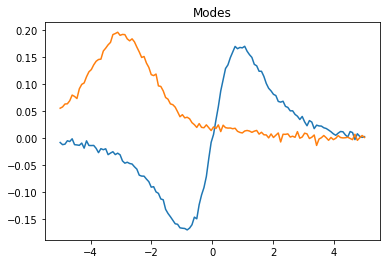

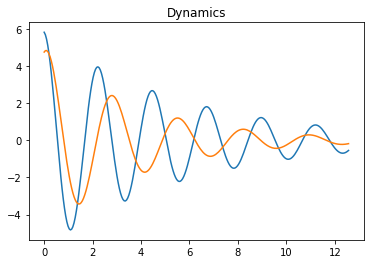

In [ ]:
for mode in dmd.modes.T:
    plt.plot(x, mode.real)
    plt.title('Modes')
plt.show()

for dynamic in dmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title('Dynamics')
plt.show()

Finally, we can reconstruct the original dataset as the product of modes and dynamics. We plot the evolution of each mode to emphasize their similarity with the input functions and we plot the reconstructed data

/Users/Jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """
/Users/Jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


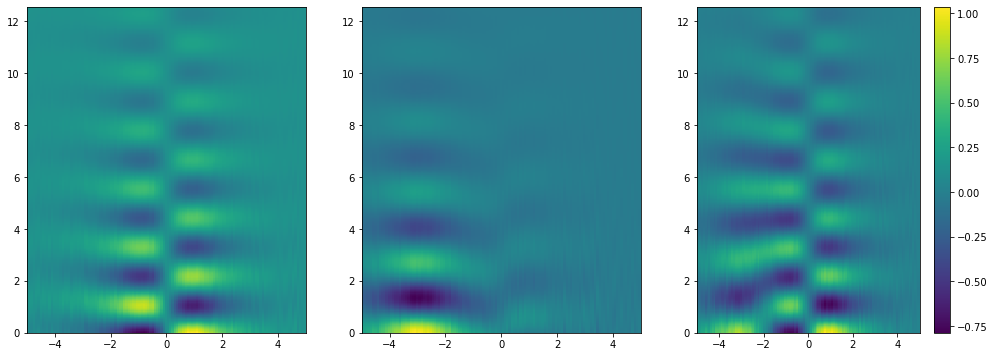

In [ ]:
fig = plt.figure(figsize=(17,6))

for n, mode, dynamic in zip(range(131, 133), dmd.modes.T, dmd.dynamics):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, (mode.reshape(-1, 1).dot(dynamic.reshape(1, -1))).real.T)
    
plt.subplot(133)
plt.pcolor(xgrid, tgrid, dmd.reconstructed_data.T.real)
plt.colorbar()

plt.show()

We can also plot the absolute error between the approximated data and the original one.

/Users/Jonas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


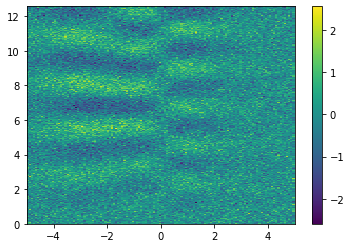

In [ ]:
plt.pcolor(xgrid, tgrid, (X-dmd.reconstructed_data.T).real)
fig = plt.colorbar()